In [1]:
# 导入MindSpore相关模块和工具库
import mindspore
import mindspore.nn as nn
from mindspore import Tensor,ops
from mindspore.common.initializer import Normal
import matplotlib.pyplot as plt
import os
from PIL import Image
import mindspore.dataset.vision as vision
import glob as glob

class LeNet5(nn.Cell):
    """
    实现LeNet5网络结构。
    
    参数:
    - num_class(int): 类别数量，默认为10。
    - num_channel(int): 输入通道数量，默认为1。
    - include_top(bool): 是否包括顶层（全连接层），默认为True。
    """
    def __init__(self, num_class=10, num_channel=1, include_top=True):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(num_channel, 6, 5, pad_mode='valid') # 第一个卷积层
        self.conv2 = nn.Conv2d(6, 16, 5, pad_mode='valid') # 第二个卷积层
        self.relu = nn.ReLU() # 激活函数
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2) # 最大池化层
        self.include_top = include_top
        if self.include_top:
            # 如果包括顶层，则初始化全连接层
            self.flatten = nn.Flatten()
            self.fc1 = nn.Dense(256, 120, weight_init=Normal(0.02))
            self.fc2 = nn.Dense(120, 84, weight_init=Normal(0.02))
            self.fc3 = nn.Dense(84, num_class, weight_init=Normal(0.02))

    def construct(self, x):
        """
        实现网络的前向传播。
        
        参数:
        - x(Tensor): 输入的张量。
        
        返回:
        - Tensor: 网络的预测结果。
        """
        x = self.conv1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        if not self.include_top:
            return x  # 如果不包括顶层，则在卷积层后返回
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [2]:
# 初始化LeNet5模型
model = LeNet5()
model_path = 'model.ckpt'
# 加载已训练的模型参数
if os.path.exists(model_path):
    param_dict = mindspore.load_checkpoint(model_path)
    mindspore.load_param_into_net(model, param_dict)
    print('Loaded model from', model_path)
else:
    print('No model found.')

def test_mydata(dir_name):
    """
    测试单个图像的分类。
    
    参数:
    - dir_name(str): 图像文件的路径。
    """
    image = Image.open(dir_name) # 打开图像文件
    image1 = image
    image = image.resize((28, 28)) # 调整图像大小
    gray = image.convert('L') # 转换为灰度图像
    to_tensor = vision.ToTensor() # 转换为张量
    img_data = to_tensor(gray)
    temp = Tensor(img_data, mindspore.float32)
    temp = temp.resize(1, 1, 28, 28) # 调整张量维度
    model.set_train(False) # 设置模型为评估模式
    result = model(temp) # 通过模型进行预测
    probability, predict = ops.max(result, 1) # 获取最大概率及其类别
    print("此手写图片值为：%d,其最大概率为：%.2f " % (predict, probability))
    plt.title("此手写图片值为：{}".format((int(predict))), fontname='SimHei')
    plt.imshow(image1) # 绘制图像
    plt.show()

Loaded model from model.ckpt


此手写图片值为：0,其最大概率为：0.25 


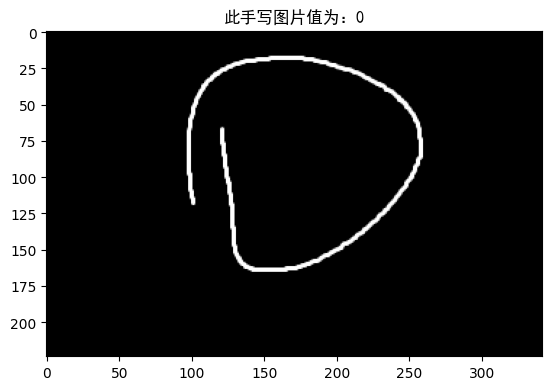

此手写图片值为：1,其最大概率为：0.75 


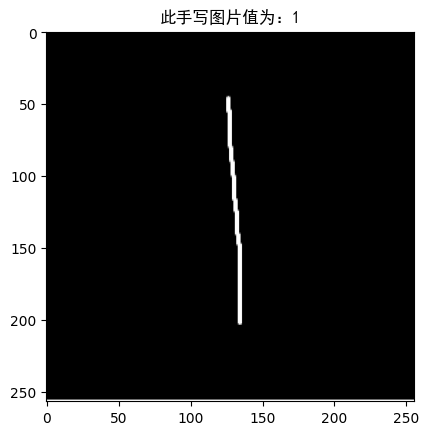

此手写图片值为：2,其最大概率为：1.16 


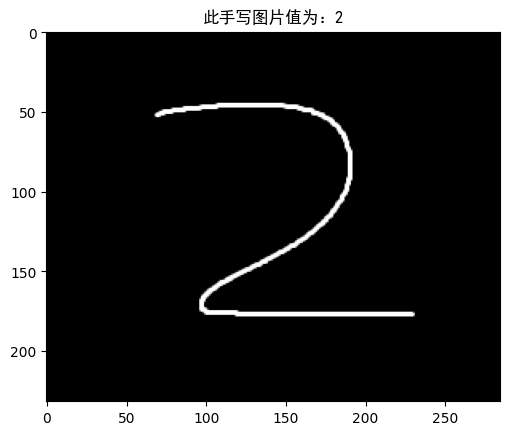

此手写图片值为：3,其最大概率为：0.71 


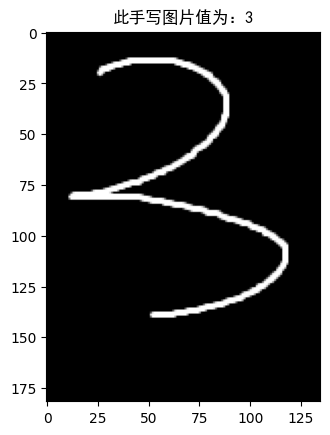

此手写图片值为：4,其最大概率为：0.48 


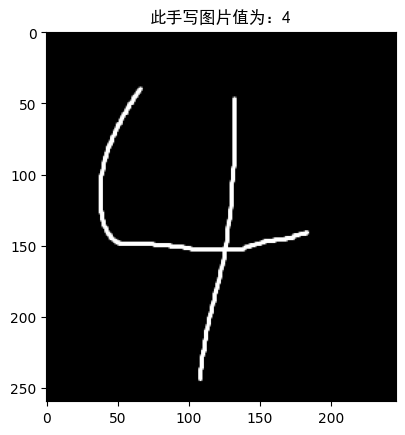

此手写图片值为：5,其最大概率为：0.70 


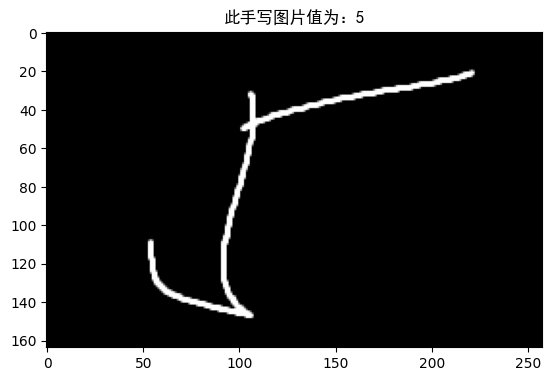

此手写图片值为：6,其最大概率为：1.25 


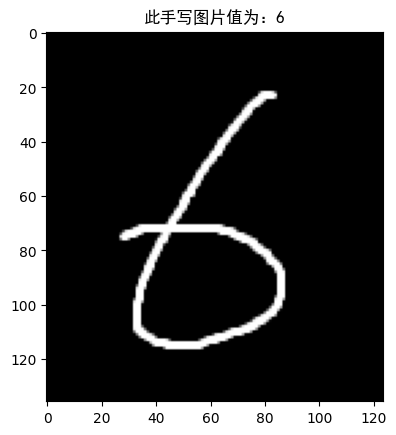

此手写图片值为：7,其最大概率为：0.47 


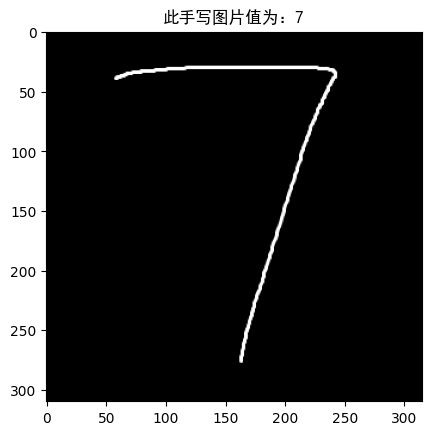

此手写图片值为：8,其最大概率为：0.74 


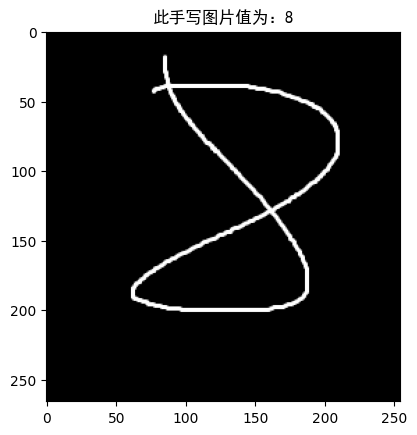

此手写图片值为：9,其最大概率为：1.33 


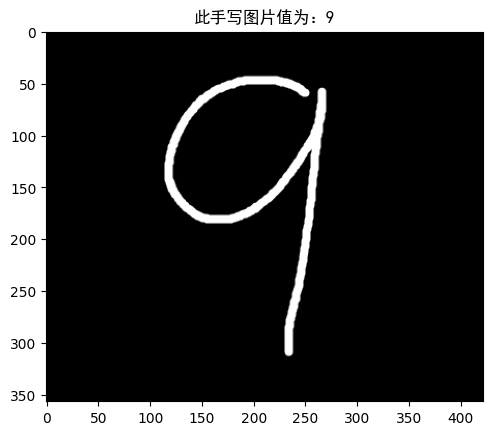

In [3]:
if __name__ == '__main__':
    test_dir = glob.glob("test/*.png")
    for i in test_dir:
        test_mydata(i)